## Objectives of the practical work

The objective is to get hands on experience on the fundamental elements of neural networks:
 
 - perceptron architecture (linear regression)
 - loss function
 - empirical loss
 - gradient descent

For this we will implement from scratch the data-structure and algorithms to train a perceptron. Note that slides related to the perceptron and neural networks in general are available on [moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822#section-2).

## Dataset

The objective of the regression is the prediction of the hydrodynamic performance of sailing yachts from dimensions and velocity.
The **inputs** are linked to dimension and hydrodynamics characteristics:
1. Longitudinal position of the center of buoyancy
(*flottabilité*), adimensional.
2. Prismatic coefficient, adimensional.
3. Length-displacement ratio, adimensional.
4. Beam -draught ratio ((*tiran d’eau*), adimensional.
5. Length-beam ratio, adimensional.
6. Froude number, adimensional

**Target value/predicted value (Output)** = Residuary resistance per unit weight of
displacement, adimensional

In [1]:
# Import some useful libraries and functions

import numpy as np
import pandas

def print_stats(dataset):
    """Print statistics of a dataset"""
    print(pandas.DataFrame(dataset).describe())


In [2]:
# Download the data set and place in the current folder (works on linux only)
filename = 'yacht_hydrodynamics.data'

import os.path
import requests

if not os.path.exists(filename):
    print("Downloading dataset...")
    r = requests.get('https://arbimo.github.io/tp-supervised-learning/tp2/' + filename)
    open(filename , 'wb').write(r.content)
    
print('Dataset available')

Dataset available


### Explore the dataset

- how many examples are there in the dataset?
- how many features for each example?
- what is the ground truth of the 10th example

In [3]:
# loads the dataset and slip between inputs (X) and ground truth (Y)
dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1] # examples features
Y = dataset[:, -1]  # ground truth
print("des exemples y en a: "+str(len(X))) #y a donc 308 exemples
# Print the first 5 examples
print_stats(X)
for i in range(0,10):
    print(f"f({X[i]}) = {Y[i]}")
    if (i==9):
        print(f"Le ground truth du dixième c'est {Y[i]}")
        
#des features y en a 6

des exemples y en a: 308
                0           1           2           3           4           5
count  308.000000  308.000000  308.000000  308.000000  308.000000  308.000000
mean    -2.381818    0.564136    4.788636    3.936818    3.206818    0.287500
std      1.513219    0.023290    0.253057    0.548193    0.247998    0.100942
min     -5.000000    0.530000    4.340000    2.810000    2.730000    0.125000
25%     -2.400000    0.546000    4.770000    3.750000    3.150000    0.200000
50%     -2.300000    0.565000    4.780000    3.955000    3.150000    0.287500
75%     -2.300000    0.574000    5.100000    4.170000    3.510000    0.375000
max      0.000000    0.600000    5.140000    5.350000    3.640000    0.450000
f([-5.    0.6   4.78  4.24  3.15  0.35]) = 8.62
f([-5.     0.565  4.77   3.99   3.15   0.15 ]) = 0.18
f([-2.3    0.565  4.78   5.35   2.76   0.15 ]) = 0.29
f([-5.     0.6    4.78   4.24   3.15   0.325]) = 6.2
f([0.    0.53  4.78  3.75  3.15  0.175]) = 0.59
f([-2.3    0.568

The following command adds a column to the inputs.

- what is in the value added this column?
- why are we doing this?

On insère une colonne de 1 au début
Cela correspond à la constante w0 nécessaire pour la suite. C'est la valeur d'initialisation, elle sera modifiée ensuite au fil de l'algorithme.

In [4]:
X = np.insert(X, 0, np.ones((len(X))), axis= 1)
print_stats(X)

           0           1           2           3           4           5  \
count  308.0  308.000000  308.000000  308.000000  308.000000  308.000000   
mean     1.0   -2.381818    0.564136    4.788636    3.936818    3.206818   
std      0.0    1.513219    0.023290    0.253057    0.548193    0.247998   
min      1.0   -5.000000    0.530000    4.340000    2.810000    2.730000   
25%      1.0   -2.400000    0.546000    4.770000    3.750000    3.150000   
50%      1.0   -2.300000    0.565000    4.780000    3.955000    3.150000   
75%      1.0   -2.300000    0.574000    5.100000    4.170000    3.510000   
max      1.0    0.000000    0.600000    5.140000    5.350000    3.640000   

                6  
count  308.000000  
mean     0.287500  
std      0.100942  
min      0.125000  
25%      0.200000  
50%      0.287500  
75%      0.375000  
max      0.450000  


## Creating the perceptron

![Perceptron for regression](https://arbimo.github.io/tp-supervised-learning/tp2/perceptron-regression.png)

We now want to define a perceptron, that is, a function of the form: 

$h_w(x) = w_0 + w_1 \times x_1 + \dots + w_n \times x_n$

- Complete the code snippet below to:
  - create the vector of weight `w`
  - implement the `h` function that evaluate an example based on the vector of weights
  - check if this works on a few examples

In [5]:
w = np.zeros(7)

def h(w, x):
    s = 0
    for i in range(len(x)):
        s += x[i] * w[i]
    return s

print(h(np.array([0, 1, 7]), np.array([1, 2, 3])))
print(h(w, X[0]))

23
0.0


## Loss function

Complete the definiton of the loss function below such that, for a **single** example `x` with ground truth `y`, it returns the $L_2$ loss of $h_w$ on `x`.

In [6]:
def loss(w, x, y):
    
    return (h(w, x) - y)**2



## Empirical loss

Complete the function below to compute the empirical loss of $h_w$ on a **set** of examples $X$ with associated ground truths $Y$.

In [7]:
def emp_loss(w, X, Y):
    
    s = 0
    for i in range(len(X)):
        s += loss(w, X[i], Y[i])
    
    return s/len(X)
    
print(emp_loss(w, X, Y))

339.2467464285712


## Gradient update

A gradient update is of the form: $w \gets w + dw$

- Complete the function below so that it computes the $dw$ term (the 'update') based on a set of examples `(X, Y)` the step (`alpha`)

If you are not sure about the gradient computation, check out the [perceptron slides](https://moodle.insa-toulouse.fr/pluginfile.php/120391/mod_resource/content/1/cm1.pdf) on [Moodle](https://moodle.insa-toulouse.fr/course/view.php?id=1822) (in particular, slide 26). Make sure this computation is clear to you!

In [8]:
# w : vecteur des poids
# dw : vecteur des 'update' de chaque poids

def compute_update(w, X, Y, alpha):
    
    
    sum_list = []
    
    for i in range(len(w)):
        s = 0
        
        for j in range(len(X)):
            s +=  (Y[j] - h(w, X[j])) * X[j][i]
            
        sum_list.append(s)
    
    return [alpha * e for e in sum_list]

print(compute_update(w, X, Y, alpha = 10e-7))

[0.0032325700000000036, -0.007563421999999996, 0.0018205134500000005, 0.015476107299999995, 0.012694348600000004, 0.010365080599999998, 0.0013099552499999995]


## Gradient descent

Now implement the gradient descent algorithm that will:

- repeatedly apply an update the weights 
- stops when a max number of iterations is reached (do not consider early stopping for now)
- returns the final vector of weights

In [9]:
def descent(w_init, X, Y, alpha, max_iter):
    
    current_iter = 0
    list_w = w_init[:] # deep copy to not alter w_init
    
    while current_iter < max_iter:
        
        
        for j, w in enumerate(list_w):
            w += compute_update(list_w, X, Y, alpha)[j]
        
        #print(emp_loss(current_w, X, Y))
        
        current_iter += 1
    
    return list_w

## Exploitation

You gradient descent is now complete and you can exploit it to train your perceptron.

- Train your perceptron to get a model.
- Visualize the evolution of the loss on the training set. Has it converged?
- Try training for several choices of `alpha` and `max_iter`. What seem like a reasonable choice?
- What is the loss associated with the final model?
- Is the final model the optimal one for a perceptron?


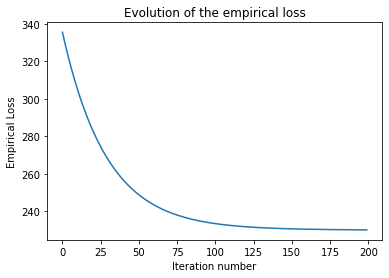

Final value : 230.05960643003465


In [35]:
import matplotlib.pyplot as plt

#w = np.empty_like(X)
# The lower alpha is, the higher max_iter has to be
w = np.zeros(7)


# On doit faire beaucoup de graphes ensuite donc on créé une fonction associée
def descent_with_plot(w_init, X, Y, alpha, max_iter, title):
    
    les_y = []
    w = w_init[:]
    for i in range(max_iter):

        for j in range(len(w)):
            w[j] += compute_update(w, X, Y, alpha)[j]
            
        les_y.append(emp_loss(w, X, Y))

    # Matplotlib affiche la taille de la figure au lieu de la figure elle-même, cette ligne règle le problème
    %matplotlib inline

    les_x = [k for k in range(max_iter)]
    plt.plot(les_x, les_y)
    plt.ylabel("Empirical Loss")
    plt.xlabel("Iteration number")
    plt.title(title)
    plt.autoscale()
    plt.show()
    
    print(f"Final value : {les_y[-1]}")

# For 10e-7 : 500 is enough, it converges very quickly
descent_with_plot(w, X, Y, 10e-7, 200, "Evolution of the empirical loss")

Il y a en effet convergence dès la 200ème itération.

C:\Users\punis\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\punis\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\punis\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
C:\Users\punis\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


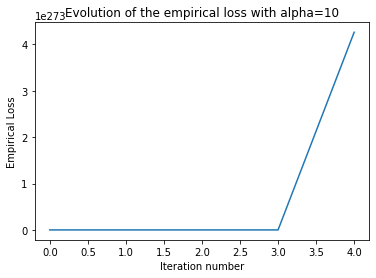

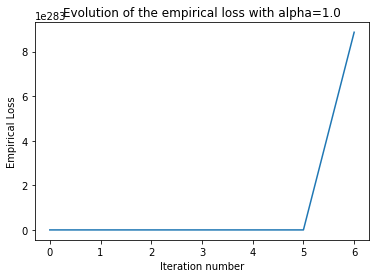

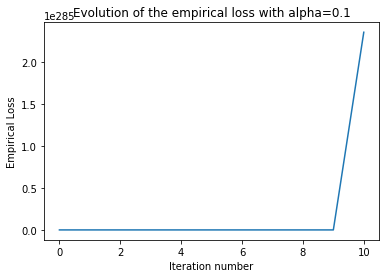

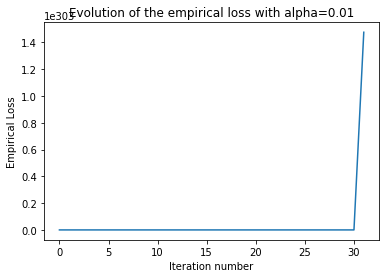

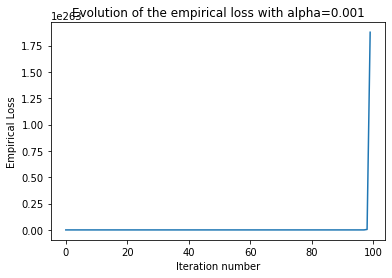

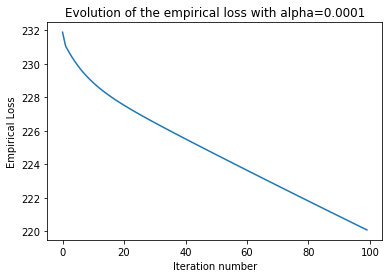

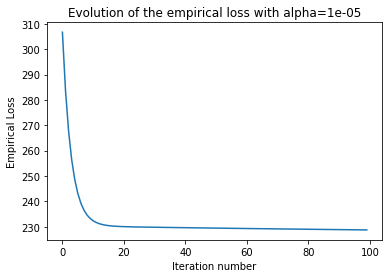

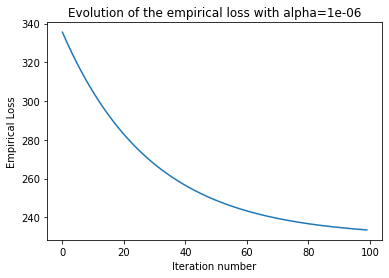

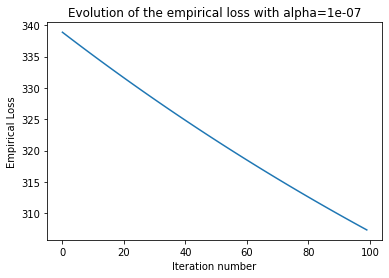

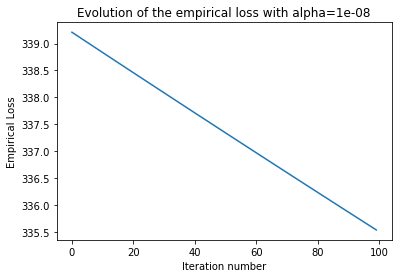

In [28]:
alphas = [10, 10e-1, 10e-2, 10e-3, 10e-4, 10e-5, 10e-6, 10e-7, 10e-8, 10e-9]
for a in alphas:
    
    descent_with_plot(w, X, Y, a, 100, f"Evolution of the empirical loss with alpha={a}")

Pour alpha < 10e-5, les valeurs débordent. Pour alpha > 10e-8, le temps d'exécution devient élevé.

max_iter = 100 suffit pour alpha=10e-5 et à peine pour alpha=10e-6. On va maintenant tester max_iter égal à 500 pour des alpha entre 10e-6 et 10e-8.

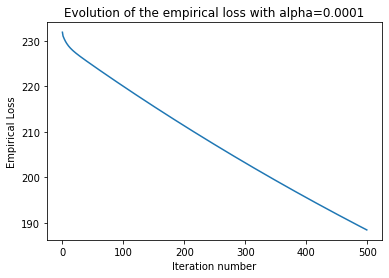

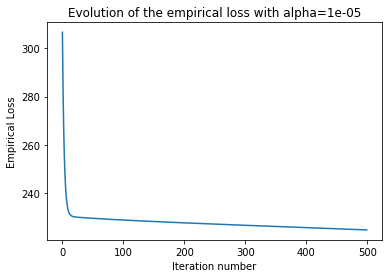

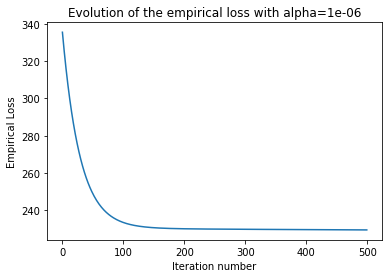

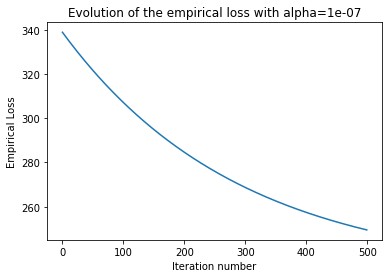

In [30]:
alphas = [10e-6, 10e-7, 10e-8]
for a in alphas:
    
    descent_with_plot(w, X, Y, a, 500, f"Evolution of the empirical loss with alpha={a}")

max_iter=500 nécessite un long temps d'exécution. Ce n'est toujours pas suffisant pour alpha>=10e-8 que l'on va donc éliminer.

max_iter=10e-7 nécessite seulement max_iter=150 pour converger. C'est un compromis acceptable entre précision et temps d'exécution.

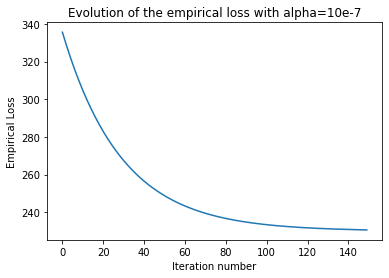

Final value : 230.64493677740933


In [36]:
# Modèle final :
descent_with_plot(w, X, Y, 10e-7, 150, f"Evolution of the empirical loss with alpha=10e-7")

# Valeur finale : 230.64493677740933

 Cette valeur finale n'est pas optimale pour un perceptron. La valeur finale devrait être 0 pour un perceptron optimal. Le modèle est donc perfectible.

Text(0, 0.5, 'f(examples)')

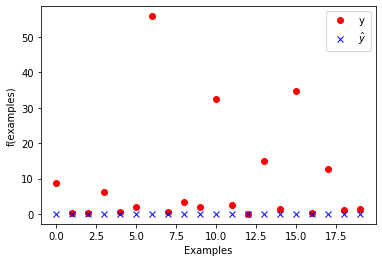

In [38]:
# Code sample that can be used to visualize the difference between the ground truth and the prediction
num_samples_to_plot = 20
plt.plot(Y[0:num_samples_to_plot], 'ro', label='y')
yw = [h(w,x) for x in X]

plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

